# EMAIL SPAM CLASSIFICATION

### imports

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

### dataset loading

In [2]:
mail_data = pd.read_csv('mail_data.csv')
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### printing shape of dataset

In [3]:
mail_data.shape

(5572, 2)

### checking for null values

In [4]:
mail_data.isnull().mean()

Category    0.0
Message     0.0
dtype: float64

### dealing with categorical data

In [5]:
le = LabelEncoder()

In [6]:
mail_data['Category'] = le.fit_transform(mail_data['Category'])

### data visualization

In [7]:
plt.rcParams['figure.figsize'] = [8,9]

Text(0.5, 1.0, 'Pie chart for the distribution of categorical mails')

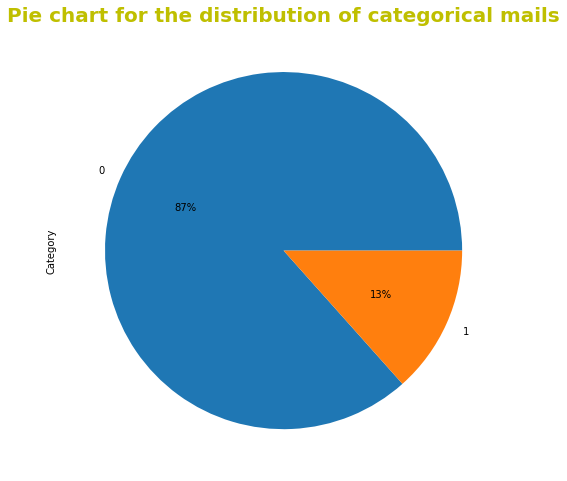

In [8]:
mail_data.Category.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Pie chart for the distribution of categorical mails',fontweight='bold', fontsize=20, color='y')

### dividing data into features and labels

In [9]:
X = mail_data['Message']
y = mail_data['Category']

### dividing dataset further to train set and test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### feature extraction

In [11]:
fe = TfidfVectorizer(min_df=1, stop_words = 'english', lowercase = 'True')

In [12]:
X_train = fe.fit_transform(X_train)
X_test = fe.transform(X_test)

## Classification Model

### 1: Naive Bayes model

In [13]:
mnb = MultinomialNB()

In [14]:
classifier = mnb.fit(X_train,y_train)
spam_pred = classifier.predict(X_test)

### 2: Random Forest Classifier

In [15]:
rf = RandomForestClassifier(n_estimators=42, random_state=500)

In [16]:
classifier2 = rf.fit(X_train, y_train)
spam_pred2 = classifier2.predict(X_test)

### model evaluation

In [17]:
print('Naive Bayes Classifier = ',accuracy_score(y_test,spam_pred)*100)
print('Random Forest Classifier = ',accuracy_score(y_test,spam_pred)*100)

Naive Bayes Classifier =  97.57847533632287
Random Forest Classifier =  97.57847533632287


### saving the model

In [18]:
naive = 'SpamMailNaiveBayesClassifier.sav'
random = 'SpamRandomForestClassifier.sav'

In [19]:
pickle.dump(classifier, open(naive,'wb'))
pickle.dump(classifier2, open(random,'wb'))

### loading the saved models for use

In [38]:
naives = pickle.load(open('SpamMailNaiveBayesClassifier.sav','rb'))
randoms = pickle.load(open('SpamRandomForestClassifier.sav','rb'))

## Making A Predictive System

In [46]:
class MailsPrediction:
    def __init__(self,mail_input):
        self.mail_input = mail_input
        
    def userMails(self):
        self.mail = input('Enter Email message\n\t')
        self.mail_input = [self.mail]
        
    def choice(self):
        choiceOfUse = eval(input('\nChoose of classification model to use below \n\t1: Naive Bayes Model\n\t2: Random Forest Model\n\t'))
        if choiceOfUse == 1:
            print(mp.predictionsWithNaive())
        elif choiceOfUse ==2:
            print(mp.predictsWithRandom())
        else:
            print('\n\tInvalid option !!!')
    
    def predictionsWithNaive(self):
        print('\nNAIVE BAYES MODEL')
        self.inputs = fe.transform(self.mail_input)
        self.predict = naives.predict(self.inputs)
        #print(self.predict)
        if self.predict[0] == 0:
            return '\n\tEmail is Ham'
        else:
            return '\n\tSpam mail... dont open'
        
    def predictsWithRandom(self):
        print('\nRANDOM FOREST CLASSIFIER')
        self.inputs = fe.transform(self.mail_input)
        self.predict = randoms.predict(self.inputs)
        if self.predict[0] == 0:
            return '\n\tEmail is Ham'
        else:
            return '\n\tSpam mail... dont open'
    
mp = MailsPrediction(mail_input='')
mp.userMails()
mp.choice()

Enter Email message
	Ok lar... Joking wif u oni...

Choose of classification model to use below 
	1: Naive Bayes Model
	2: Random Forest Model
	2

RANDOM FOREST CLASSIFIER

	Email is Ham
